# Predicting house prices using machine learning

In [162]:
import pandas as pd
import seaborn as sns
import haversine as hs

In [163]:
#2023 data
df23 = pd.read_csv('pp-2023.csv', names=['transaction_id','price','transaction_date','postcode','property_type','is_new','tenure','paon','saon','street','locality','city','district','county','ppd','record_status'])

In [164]:
#2022 data
df22 = pd.read_csv('pp-2022.csv', names=['transaction_id','price','transaction_date','postcode','property_type','is_new','tenure','paon','saon','street','locality','city','district','county','ppd','record_status'])

In [165]:
#2021 data
df21 = pd.read_csv('pp-2021.csv', names=['transaction_id','price','transaction_date','postcode','property_type','is_new','tenure','paon','saon','street','locality','city','district','county','ppd','record_status'])

In [166]:
# joining the 3 above files together
df = pd.concat([df21, df22, df23], ignore_index=True)

In [ ]:
df

,transaction_id,price,transaction_date,postcode,property_type,is_new,tenure,paon,saon,street,locality,city,district,county,ppd,record_status
0,{D22473F5-3802-7B40-E053-6C04A8C0A630},230000,2021-06-09 00:00,CO13 0PQ,D,N,F,4,NaN,BELLAMY CLOSE,KIRBY CROSS,FRINTON-ON-SEA,TENDRING,ESSEX,A,A
1,{D22473F5-3803-7B40-E053-6C04A8C0A630},700000,2021-06-25 00:00,IG10 4BS,T,N,F,70,NaN,SMARTS LANE,NaN,LOUGHTON,EPPING FOREST,ESSEX,A,A
2,{D22473F5-3804-7B40-E053-6C04A8C0A630},625000,2021-06-28 00:00,EN9 1LH,S,N,F,7,NaN,THE COBBINS,NaN,WALTHAM ABBEY,EPPING FOREST,ESSEX,A,A
3,{D22473F5-3805-7B40-E053-6C04A8C0A630},360000,2021-02-17 00:00,SS9 3AU,S,N,F,117,NaN,FLEMMING AVENUE,NaN,LEIGH-ON-SEA,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,A,A
4,{D22473F5-3806-7B40-E053-6C04A8C0A630},345000,2021-06-25 00:00,SS15 6BG,S,N,F,2,NaN,BROADWATER GREEN,LAINDON,BASILDON,BASILDON,ESSEX,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893790,{06C9F487-585E-9388-E063-4804A8C0BD98},172500,2023-03-03 00:00,CM8 2AW,F,N,L,WHITEHALL COURT,FLAT 28,NEWLAND STREET,NaN,WITHAM,BRAINTREE,ESSEX,A,A
2893791,{06C9F487-585F-9388-E063-4804A8C0BD98},375000,2023-08-17 00:00,CM8 2DJ,S,N,F,20,NaN,THE AVENUE,NaN,WITHAM,BRAINTREE,ESSEX,A,A
2893792,{06C9F487-5860-9388-E063-4804A8C0BD98},610000,2023-08-22 00:00,CO3 3NR,D,N,F,41,NaN,CAMBRIDGE ROAD,NaN,COLCHESTER,COLCHESTER,ESSEX,A,A
2893793,{06C9F487-5861-9388-E063-4804A8C0BD98},525000,2023-07-31 00:00,CM15 9NP,S,N,F,12,NaN,ELIZABETH ROAD,PILGRIMS HATCH,BRENTWOOD,BRENTWOOD,ESSEX,A,A


# Initial Analysis

<Axes: xlabel='price', ylabel='property_type'>

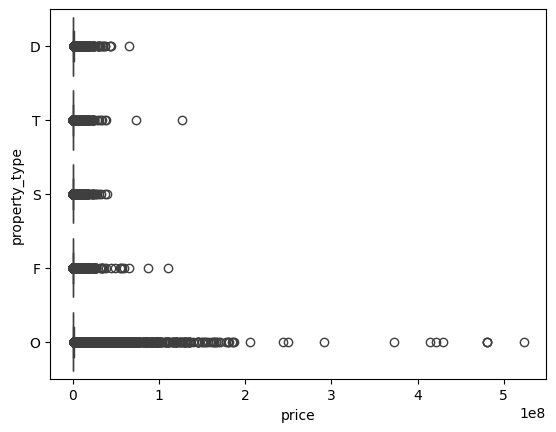

In [7]:
# The boxplot below shows 'Other' type of home has a lot of outliers compared to the others
sns.boxplot(df, x="price", y="property_type")

<Axes: xlabel='price', ylabel='is_new'>

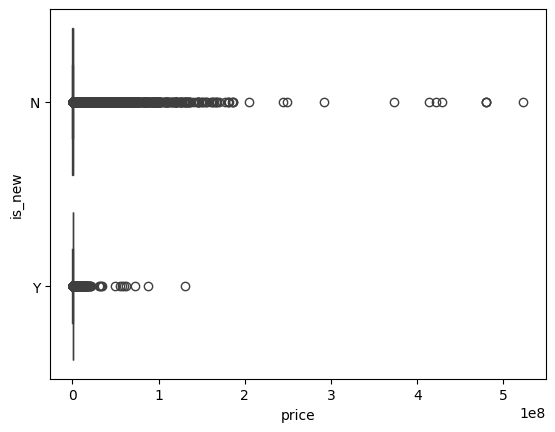

In [8]:
# THE BOXPLOT BELOW SHOWS THAT WHETHER HOUSES ARE NEW OR NOT DOES NOT AFFECT THE PRICE MUCH. HOWEVER, OLD BUILDS HAVE MANY MORE OUTLIERS WITH A HIGHER PRICE SO IT IS A SIGNIFICANT CATEGORY
sns.boxplot(df, x="price", y="is_new")

<Axes: xlabel='price', ylabel='tenure'>

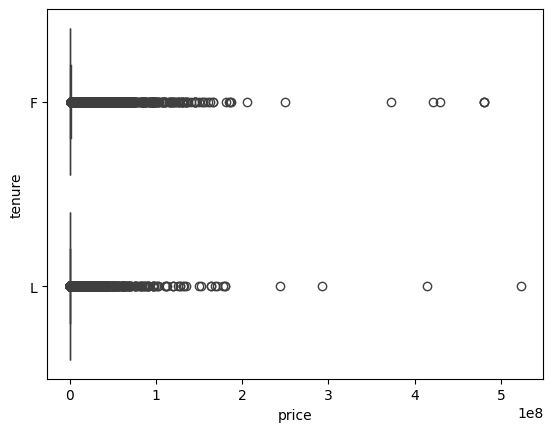

In [9]:
# THE BOXPLOT BELOW SHOWS THAT TENURE DOES NOT AFFECT THE PRICE MUCH.
sns.boxplot(df, x="price", y="tenure")

In [8]:
new_df = df.groupby(by ='city')['price'].median()

# The cities with the highest price median/most expensive
new_df.sort_values(ascending=False)



city
GATWICK            13525000.0
COBHAM              1000000.0
BEACONSFIELD         950000.0
VIRGINIA WATER       950000.0
ESHER                925000.0
                      ...    
FERNDALE              78000.0
TRIMDON STATION       77500.0
PETERLEE              70000.0
FERRYHILL             65000.0
SHILDON               60000.0
Name: price, Length: 1151, dtype: float64

In [9]:
df[df['city']=='LONDON'].shape[0]
#194663 values are for London


194663

In [10]:
df[df['city']=='GATWICK'].shape[0]
#2 values for Gatwick

2

<Axes: xlabel='city', ylabel='price'>

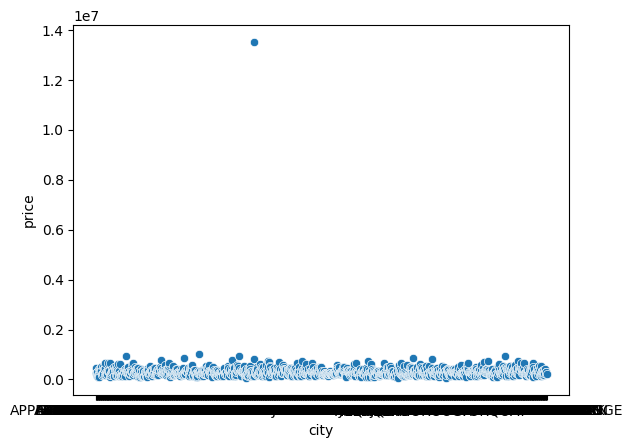

In [11]:
by_city =df.groupby(by ='city')['price'].median()
by_city_df = pd.DataFrame(by_city).reset_index()
sns.scatterplot(data=by_city_df, x="city", y="price")
#scatter plot of city by price

In [12]:
distribution = df.city.value_counts(normalize=True)
distribution
#distribution of the data. London, Manchester, Bristol, Birmingham and Nottingham are the highest

city
LONDON           6.726911e-02
MANCHESTER       1.652985e-02
BRISTOL          1.501108e-02
BIRMINGHAM       1.377326e-02
NOTTINGHAM       1.329569e-02
                     ...     
LLANSANFFRAID    6.911340e-07
GATWICK          6.911340e-07
KELSO            3.455670e-07
GRETNA           3.455670e-07
PORT DINORWIC    3.455670e-07
Name: proportion, Length: 1151, dtype: float64

In [13]:
#dictionary format
by_city.to_dict()

{'ABBOTS LANGLEY': 460000.0,
 'ABERAERON': 263000.0,
 'ABERDARE': 125000.0,
 'ABERDOVEY': 285125.0,
 'ABERGAVENNY': 290000.0,
 'ABERGELE': 195000.0,
 'ABERTILLERY': 95000.0,
 'ABERYSTWYTH': 215000.0,
 'ABINGDON': 400000.0,
 'ACCRINGTON': 112000.0,
 'ADDLESTONE': 435000.0,
 'ALCESTER': 325000.0,
 'ALDEBURGH': 485000.0,
 'ALDERLEY EDGE': 499950.0,
 'ALDERSHOT': 345000.0,
 'ALFORD': 215000.0,
 'ALFRETON': 175000.0,
 'ALNWICK': 250000.0,
 'ALRESFORD': 500000.0,
 'ALSTON': 197500.0,
 'ALTON': 420000.0,
 'ALTRINCHAM': 425000.0,
 'AMBLESIDE': 474000.0,
 'AMERSHAM': 672000.0,
 'AMLWCH': 192750.0,
 'AMMANFORD': 165000.0,
 'ANDOVER': 300000.0,
 'APPLEBY-IN-WESTMORLAND': 223000.0,
 'ARLESEY': 312000.0,
 'ARTHOG': 231500.0,
 'ARUNDEL': 415000.0,
 'ASCOT': 660000.0,
 'ASHBOURNE': 340000.0,
 'ASHBY-DE-LA-ZOUCH': 297500.0,
 'ASHFORD': 337500.0,
 'ASHINGTON': 97875.0,
 'ASHTEAD': 673200.0,
 'ASHTON-UNDER-LYNE': 160000.0,
 'ASKAM-IN-FURNESS': 184000.0,
 'ATHERSTONE': 245000.0,
 'ATTLEBOROUGH': 280000.0

In [14]:
#median taking into account distribution by putting in dictionary. k = city, v = median
scaled_median = {}

for k,v in by_city.items():
    scaled_median[k] = v * distribution[k]

scaled_df = pd.DataFrame(pd.Series(scaled_median),columns=['price']).reset_index(names=['city'])
scaled_df.sort_values(by = ['price'],ascending=False)

,city,price
614,LONDON,37872.506173
160,BRISTOL,4931.141114
647,MANCHESTER,3504.328399
112,BIRMINGHAM,2892.385259
736,NOTTINGHAM,2831.915400
...,...,...
679,MINDRUM,0.553339
606,LLANSANFFRAID,0.190062
423,GRETNA,0.154987
785,PORT DINORWIC,0.103670


<Axes: xlabel='city', ylabel='price'>

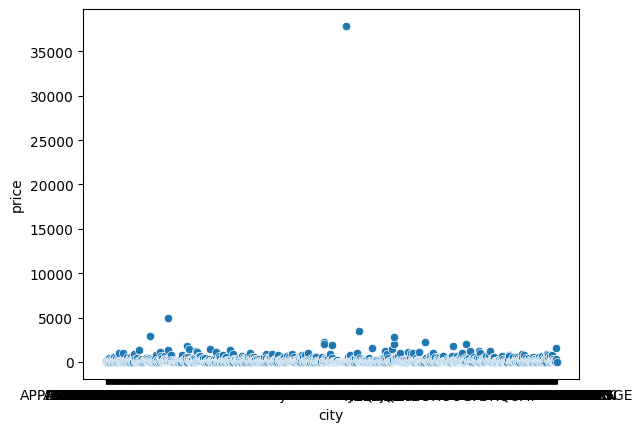

In [15]:
sns.scatterplot(data=scaled_df, x="city", y="price")
#A scatter graph with the scaled median
#The below shows that London is an outlier and so whether a house is in London or not will have a significant impact on the price

In [16]:
new_df2 = df.groupby(by ='postcode')['price'].median()
new_df2.sort_values(ascending=False)
# However the 5 postcode with the highest median/most expensive have 2 in London

postcode
WV2 2JL     480000000.0
WV2 2JQ     480000000.0
WC1B 4JB    429000000.0
E1 8EP      421364142.0
M3 3AQ      292000000.0
               ...     
CR2 6PA           100.0
DE13 9LU          100.0
SO14 6RL          100.0
TW16 6LG          100.0
SK8 1QJ           100.0
Name: price, Length: 916939, dtype: float64

In [17]:
#The below does the same but for postcode. it plots the median taking into account the distribution
#It is more distributed that the city scatter graph which tells us that postcode can give us a bit more information
distribution = df.postcode.value_counts(normalize=True)


by_pc =df.groupby(by ='postcode')['price'].median()
by_pc_df = pd.DataFrame(by_pc).reset_index()

by_pc.to_dict()

scaled_median2 = {}

for k,v in by_pc.items():
    scaled_median2[k] = v * distribution[k]

scaled_df2 = pd.DataFrame(pd.Series(scaled_median2),columns=['price']).reset_index(names=['postcode'])
scaled_df2.sort_values(by = ['price'],ascending=False)

sns.scatterplot(data=scaled_df2, x="postcode", y="price")

<Axes: xlabel='postcode', ylabel='price'>

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x10b32f6b0>>
Traceback (most recent call last):
  File "/Users/adamsatvilker/sharifaCW/venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [17]:
#this is to make a comparison later with same no.rows after feature engineering
sample_df = df.sample(n=9406, random_state=42)

<Axes: xlabel='postcode', ylabel='price'>

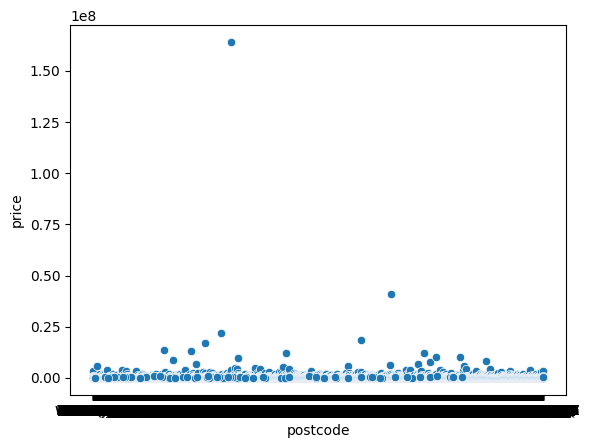

In [18]:
sns.scatterplot(sample_df, x="postcode", y="price")

# Cleaning Dataset

In [168]:
#converts the 'transaction_date' column into a datetime data type
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [169]:
#create a new column named 'date' in the df, adds in the date from the 'transaction_date' column as strings
df['date'] = df['transaction_date'].dt.strftime('%Y-%m')

In [170]:
#using the pd.get_dummies() function from pandas library to convert the below variables that have categories into 'dummy' variables as integers
df = pd.get_dummies(df,columns=['property_type','tenure','is_new'],dtype=int)

In [171]:
df = df[df['date']>= '2021-03']

In [11]:
df

,transaction_id,price,transaction_date,postcode,paon,saon,street,locality,city,district,...,date,property_type_D,property_type_F,property_type_O,property_type_S,property_type_T,tenure_F,tenure_L,is_new_N,is_new_Y
0,{D22473F5-3802-7B40-E053-6C04A8C0A630},230000,2021-06-09,CO13 0PQ,4,NaN,BELLAMY CLOSE,KIRBY CROSS,FRINTON-ON-SEA,TENDRING,...,2021-06,1,0,0,0,0,1,0,1,0
1,{D22473F5-3803-7B40-E053-6C04A8C0A630},700000,2021-06-25,IG10 4BS,70,NaN,SMARTS LANE,NaN,LOUGHTON,EPPING FOREST,...,2021-06,0,0,0,0,1,1,0,1,0
2,{D22473F5-3804-7B40-E053-6C04A8C0A630},625000,2021-06-28,EN9 1LH,7,NaN,THE COBBINS,NaN,WALTHAM ABBEY,EPPING FOREST,...,2021-06,0,0,0,1,0,1,0,1,0
4,{D22473F5-3806-7B40-E053-6C04A8C0A630},345000,2021-06-25,SS15 6BG,2,NaN,BROADWATER GREEN,LAINDON,BASILDON,BASILDON,...,2021-06,0,0,0,1,0,1,0,1,0
5,{D22473F5-3807-7B40-E053-6C04A8C0A630},220000,2021-08-20,CO7 0HE,133,NaN,CHAPEL ROAD,BRIGHTLINGSEA,COLCHESTER,TENDRING,...,2021-08,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893790,{06C9F487-585E-9388-E063-4804A8C0BD98},172500,2023-03-03,CM8 2AW,WHITEHALL COURT,FLAT 28,NEWLAND STREET,NaN,WITHAM,BRAINTREE,...,2023-03,0,1,0,0,0,0,1,1,0
2893791,{06C9F487-585F-9388-E063-4804A8C0BD98},375000,2023-08-17,CM8 2DJ,20,NaN,THE AVENUE,NaN,WITHAM,BRAINTREE,...,2023-08,0,0,0,1,0,1,0,1,0
2893792,{06C9F487-5860-9388-E063-4804A8C0BD98},610000,2023-08-22,CO3 3NR,41,NaN,CAMBRIDGE ROAD,NaN,COLCHESTER,COLCHESTER,...,2023-08,1,0,0,0,0,1,0,1,0
2893793,{06C9F487-5861-9388-E063-4804A8C0BD98},525000,2023-07-31,CM15 9NP,12,NaN,ELIZABETH ROAD,PILGRIMS HATCH,BRENTWOOD,BRENTWOOD,...,2023-07,0,0,0,1,0,1,0,1,0


In [172]:
#These features are dropped as they don't add value
df1 = df.drop(columns=['paon','saon','street','locality','city','county','ppd','record_status'])

In [173]:
#this is a boolean mask that is based on grouping the df by the 'postcode' and 'date' columns. then checks if the count of 'price' is >=2 for that postcode in that month
mask = df.groupby(by=['postcode','date'])['price'].count() >=2

In [174]:
#This filters the df based on groups defined by unique combinations of these 2 columns. Then applies the aggregate() method to apply aggregation functions to each column within each group and creates new columns
filtered_df = df1.groupby(by=['postcode','date']).aggregate(
    mean_price = pd.NamedAgg('price','mean'),
    district = pd.NamedAgg('district','first'),
    sum_property_type_d = pd.NamedAgg('property_type_D','sum'),
    sum_property_type_f = pd.NamedAgg('property_type_F','sum'),
    sum_property_type_o = pd.NamedAgg('property_type_O','sum'),
    sum_property_type_s = pd.NamedAgg('property_type_S','sum'),
    sum_property_type_t = pd.NamedAgg('property_type_T','sum'),
    sum_tenure_f = pd.NamedAgg('tenure_F','sum'),
    sum_tenure_l = pd.NamedAgg('tenure_L','sum'),
    sum_is_new_n = pd.NamedAgg('is_new_N','sum'),
    sum_is_new_y = pd.NamedAgg('is_new_Y','sum')
)[mask]


In [13]:
filtered_df

mean_price         district  sum_property_type_d  \
postcode date                                                          
AL1 1AS  2021-03  6.087500e+05        ST ALBANS                    0   
AL1 1AU  2021-03  1.471875e+06        ST ALBANS                    1   
AL1 1DU  2022-02  8.675000e+05        ST ALBANS                    1   
AL1 1HY  2023-12  2.278333e+06        ST ALBANS                    1   
AL1 1NF  2021-03  6.425000e+05        ST ALBANS                    0   
...                        ...              ...                  ...   
YO8 9UE  2021-09  2.869950e+05            SELBY                    1   
         2021-10  2.268550e+05            SELBY                    0   
         2021-11  2.799950e+05            SELBY                    3   
         2021-12  2.988283e+05            SELBY                    4   
         2022-02  2.829950e+05  NORTH YORKSHIRE                    3   

                  sum_property_type_f  sum_property_type_o  \
postcode date                                                
AL1 1AS  2021-03                    0                    0   
AL1 1AU  2021-03                    0                    0   
AL1 1DU  2022-02                    0                    0   
AL1 1HY  2023-12                    0                    2   
AL1 1NF  2021-03                    0                    0   
...                               ...                  ...   
YO8 9UE  2021-09                    0                    0   
         2021-10                    0                    0   
         2021-11                    0                    0   
         2021-12                    0                    0   
         2022-02                    0                    0   

                  sum_property_type_s  sum_property_type_t  sum_tenure_f  \
postcode date                                                              
AL1 1AS  2021-03                    0                    2             2   
AL1 1AU  2021-03                    1                    0             2   
AL1 1DU  2022-02                    1                    0             2   
AL1 1HY  2023-12                    0                    0             3   
AL1 1NF  2021-03                    1                    1             2   
...                               ...                  ...           ...   
YO8 9UE  2021-09                    1                    0             2   
         2021-10                    5                    0             5   
         2021-11                    2                    0             5   
         2021-12                    2                    0             6   
         2022-02                    0                    0             3   

                  sum_tenure_l  sum_is_new_n  sum_is_new_y  
postcode date                                               
AL1 1AS  2021-03             0             2             0  
AL1 1AU  2021-03             0             2             0  
AL1 1DU  2022-02             0             2             0  
AL1 1HY  2023-12             0             3             0  
AL1 1NF  2021-03             0             2             0  
...                        ...           ...           ...  
YO8 9UE  2021-09             0             0             2  
         2021-10             0             0             5  
         2021-11             0             0             5  
         2021-12             0             0             6  
         2022-02             0             0             3  

[207862 rows x 11 columns]

In [175]:
#This gets the unique values from the 1st level of the index of the dataframe, then calculates the number of unique values
filtered_df.index.get_level_values(0).nunique()

142703

# import Police Crime Data

In [176]:
import requests
import numpy as np

In [177]:
#This reads the UKPostcode file into the 'postcodes' dataframe. Sets the column 'id' as the index. Then resets the index to default integers from 0
postcodes = pd.read_csv('./ukpostcodes.csv',index_col='id').reset_index(drop=True)

In [ ]:
postcodes

,postcode,latitude,longitude
0,AB10 1XG,57.144156,-2.114864
1,AB10 6RN,57.137871,-2.121487
2,AB10 7JB,57.124274,-2.127206
3,AB11 5QN,57.142701,-2.093295
4,AB11 6UL,57.137468,-2.112455
...,...,...,...
1794529,YO7 4FB,54.243953,-1.472731
1794530,YO7 9DN,54.232597,-1.328747
1794531,YO8 4FS,53.779924,-1.069318
1794532,YO8 6DX,53.809575,-0.923888


In [178]:
#This resets the index for the dataframe and prints the datatypes
filtered_df.reset_index().dtypes

postcode                object
date                    object
mean_price             float64
district                object
sum_property_type_d      int64
sum_property_type_f      int64
sum_property_type_o      int64
sum_property_type_s      int64
sum_property_type_t      int64
sum_tenure_f             int64
sum_tenure_l             int64
sum_is_new_n             int64
sum_is_new_y             int64
dtype: object

In [179]:
#This resets the index of the dataframe and then sets 'postcode' as the index of filtered_df then joins the dataframes by 'postcode' . then sets a multi Index  consisting of 'postcode' and 'date' 
filtered_df = filtered_df.reset_index().set_index('postcode').join(postcodes.set_index('postcode')).reset_index().set_index(['postcode','date'])

In [ ]:
filtered_df

mean_price         district  sum_property_type_d  \
postcode date                                                          
AL1 1AS  2021-03  6.087500e+05        ST ALBANS                    0   
AL1 1AU  2021-03  1.471875e+06        ST ALBANS                    1   
AL1 1DU  2022-02  8.675000e+05        ST ALBANS                    1   
AL1 1HY  2023-12  2.278333e+06        ST ALBANS                    1   
AL1 1NF  2021-03  6.425000e+05        ST ALBANS                    0   
...                        ...              ...                  ...   
YO8 9UE  2021-09  2.869950e+05            SELBY                    1   
         2021-10  2.268550e+05            SELBY                    0   
         2021-11  2.799950e+05            SELBY                    3   
         2021-12  2.988283e+05            SELBY                    4   
         2022-02  2.829950e+05  NORTH YORKSHIRE                    3   

                  sum_property_type_f  sum_property_type_o  \
postcode date                                                
AL1 1AS  2021-03                    0                    0   
AL1 1AU  2021-03                    0                    0   
AL1 1DU  2022-02                    0                    0   
AL1 1HY  2023-12                    0                    2   
AL1 1NF  2021-03                    0                    0   
...                               ...                  ...   
YO8 9UE  2021-09                    0                    0   
         2021-10                    0                    0   
         2021-11                    0                    0   
         2021-12                    0                    0   
         2022-02                    0                    0   

                  sum_property_type_s  sum_property_type_t  sum_tenure_f  \
postcode date                                                              
AL1 1AS  2021-03                    0                    2             2   
AL1 1AU  2021-03                    1                    0             2   
AL1 1DU  2022-02                    1                    0             2   
AL1 1HY  2023-12                    0                    0             3   
AL1 1NF  2021-03                    1                    1             2   
...                               ...                  ...           ...   
YO8 9UE  2021-09                    1                    0             2   
         2021-10                    5                    0             5   
         2021-11                    2                    0             5   
         2021-12                    2                    0             6   
         2022-02                    0                    0             3   

                  sum_tenure_l  sum_is_new_n  sum_is_new_y   latitude  \
postcode date                                                           
AL1 1AS  2021-03             0             2             0  51.749073   
AL1 1AU  2021-03             0             2             0  51.741475   
AL1 1DU  2022-02             0             2             0  51.731178   
AL1 1HY  2023-12             0             3             0  51.737854   
AL1 1NF  2021-03             0             2             0  51.749499   
...                        ...           ...           ...        ...   
YO8 9UE  2021-09             0             0             2  53.771428   
         2021-10             0             0             5  53.771428   
         2021-11             0             0             5  53.771428   
         2021-12             0             0             6  53.771428   
         2022-02             0             0             3  53.771428   

                  longitude  
postcode date                
AL1 1AS  2021-03  -0.335471  
AL1 1AU  2021-03  -0.319273  
AL1 1DU  2022-02  -0.315840  
AL1 1HY  2023-12  -0.314440  
AL1 1NF  2021-03  -0.336918  
...                     ...  
YO8 9UE  2021-09  -1.160421  
         2021-10  -1.160421  
         2021-11  -1.160421  
       

In [180]:
#This removes rows with missing values, inplace is so that it applies it directly to the df
filtered_df.dropna(inplace=True)

In [181]:
#This uses the requests library to get the crime categories from the Police Uk API and adds new columns for each of these categories to the df, giving them all the value 0 
categories = requests.get(f'https://data.police.uk/api/crime-categories').json()
for cat in categories:
    filtered_df[cat['url']] = 0

In [182]:
#exports filtered_df to a csv file called data
filtered_df.to_csv('data.csv')

In [183]:
#This joins the 4 files (data.csv split into 4)
processed_df = pd.concat([pd.read_csv('output1.csv'),pd.read_csv('output2.csv'),pd.read_csv('output3.csv'),pd.read_csv('output4.csv')]).drop(columns=['Unnamed: 0'])

In [184]:
# This adds the 6 month neighbourhood average price and sets it to nan
processed_df['6mna-mean_price'] = np.nan


In [185]:
# creates columns for crime categories with 6mna prefix
crime_cols = list(map(lambda x:x['url'],categories))
for crime in crime_cols:
    processed_df[f'6mna-{crime}'] = processed_df[crime]

In [186]:
processed_df.set_index(['postcode', 'date'], inplace=True)

In [187]:
processed_df.isna().sum()

mean_price                         0
district                           0
sum_property_type_d                0
sum_property_type_f                0
sum_property_type_o                0
sum_property_type_s                0
sum_property_type_t                0
sum_tenure_f                       0
sum_tenure_l                       0
sum_is_new_n                       0
sum_is_new_y                       0
latitude                           0
longitude                          0
all-crime                          0
anti-social-behaviour              0
bicycle-theft                      0
burglary                           0
criminal-damage-arson              0
drugs                              0
other-theft                        0
possession-of-weapons              0
public-order                       0
robbery                            0
shoplifting                        0
theft-from-the-person              0
vehicle-crime                      0
violent-crime                      0
o

In [ ]:
#calculates the 6mna for features, ran over 6 cores of laptop. NO NEED TO RUN AGAIN as i saved it to a csv file
from pandas.tseries.offsets import DateOffset
from multiprocesspandas import applyparallel
average_cols = [col for col in processed_df.columns.to_list() if col.startswith('6mna')]
def get_averages(row:pd.Series, df, average_cols):
    district_df = df[df['district'] == row['district']]
    start_date = pd.to_datetime(row.name[1]) - DateOffset(months=6)
    end_date =   pd.to_datetime(row.name[1])
    last_6_months = district_df[(pd.to_datetime(district_df.index.get_level_values(1))>=start_date) & (pd.to_datetime(district_df.index.get_level_values(1))<end_date)]
    mask = last_6_months.apply(lambda nextRow: hs.haversine((row['latitude'],row['longitude']),(nextRow['latitude'],nextRow['longitude'])) <= 3.2, axis=1)
    neighbours = last_6_months[mask]
    
    if neighbours.shape[0] > 0:
        for col in average_cols:
            row[col] = neighbours[col.split('-',1)[1]].mean()
        
    return row
processed_6mna_df = processed_df.apply_parallel(lambda row: get_averages(row, processed_df, average_cols), axis=0)
processed_6mna_df.to_csv('processed_6mna.csv')

 17%|█▋        | 34569/207427 [00:08<00:40, 4279.84it/s]


KeyboardInterrupt: 

In [188]:
processed_6mna_df = pd.read_csv('processed_6mna.csv')

In [189]:
processed_6mna_df.isna().sum()

postcode                          0
date                              0
mean_price                        0
district                          0
sum_property_type_d               0
sum_property_type_f               0
sum_property_type_o               0
sum_property_type_s               0
sum_property_type_t               0
sum_tenure_f                      0
sum_tenure_l                      0
sum_is_new_n                      0
sum_is_new_y                      0
latitude                          0
longitude                         0
all-crime                         0
anti-social-behaviour             0
bicycle-theft                     0
burglary                          0
criminal-damage-arson             0
drugs                             0
other-theft                       0
possession-of-weapons             0
public-order                      0
robbery                           0
shoplifting                       0
theft-from-the-person             0
vehicle-crime               

In [190]:
processed_6mna_df[processed_6mna_df['date']>='2021-04'][['postcode', 'date', '6mna-mean_price']].isna().sum()

postcode              0
date                  0
6mna-mean_price    4040
dtype: int64

In [191]:
processed_6mna_df = processed_6mna_df[processed_6mna_df['date']>='2021-04']

In [192]:
# To identify postcodes with 0 values for 6mna mean price
postcodes = processed_6mna_df[['postcode', 'date', '6mna-mean_price']].groupby(by=['postcode'])['6mna-mean_price'].count().loc[lambda x: x <1].index.to_list()

In [193]:
# Removes the nulls identified in the previous step
processed_6mna_df = processed_6mna_df[~processed_6mna_df['postcode'].isin(postcodes)]

In [194]:
# calculates no.missing values
processed_6mna_df['6mna-mean_price'].isna().sum()

765

In [195]:
processed_6mna_df[processed_6mna_df['6mna-mean_price'].isna()]

,postcode,date,mean_price,district,sum_property_type_d,sum_property_type_f,sum_property_type_o,sum_property_type_s,sum_property_type_t,sum_tenure_f,...,6mna-drugs,6mna-other-theft,6mna-possession-of-weapons,6mna-public-order,6mna-robbery,6mna-shoplifting,6mna-theft-from-the-person,6mna-vehicle-crime,6mna-violent-crime,6mna-other-crime
737,AL9 7AY,2021-05,447500.000000,WELWYN HATFIELD,1,1,0,0,0,1,...,0.0,1.0,0.0,2.0,0.0,2.0,0.0,7.0,2.0,0.0
3130,B49 5DJ,2021-05,132500.000000,STRATFORD-ON-AVON,0,2,0,0,0,0,...,1.0,3.0,0.0,1.0,0.0,0.0,0.0,4.0,18.0,0.0
4288,B74 3BF,2023-04,362500.000000,LICHFIELD,0,2,0,0,0,0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0
4755,B78 2HL,2022-05,211500.000000,NORTH WARWICKSHIRE,0,0,0,2,0,2,...,0.0,1.0,2.0,1.0,0.0,0.0,0.0,6.0,4.0,1.0
4888,B79 0GA,2022-06,529995.000000,LICHFIELD,2,0,0,0,0,2,...,2.0,5.0,0.0,3.0,0.0,3.0,0.0,16.0,26.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207130,YO7 3FJ,2021-04,225500.833333,NORTH YORKSHIRE,0,0,0,6,0,6,...,2.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,10.0,0.0
207171,YO7 3FZ,2022-03,389999.333333,NORTH YORKSHIRE,3,0,0,0,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
207203,YO7 3SZ,2022-03,297000.000000,NORTH YORKSHIRE,1,0,0,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
207316,YO8 6QU,2023-08,452500.000000,NORTH YORKSHIRE,2,0,0,0,0,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0


In [197]:
#example
processed_6mna_df[processed_6mna_df['postcode'] == 'AL9 7AY'][['postcode','date','6mna-mean_price']]

,postcode,date,6mna-mean_price
737,AL9 7AY,2021-05,NaN
738,AL9 7AY,2021-06,337000.0
739,AL9 7AY,2021-10,736500.0


In [196]:
#retrieve values from column
processed_6mna_df.loc[:,'6mna-mean_price']

2         653499.498810
3         680483.333333
5         618314.816239
6         569065.591398
8         670334.553191
              ...      
207422    234401.430208
207423    236550.060833
207424    223208.873333
207425    233710.355556
207426              NaN
Name: 6mna-mean_price, Length: 188568, dtype: float64

In [198]:
#missing values in the '6mna-mean_price' column are replaced with the last known (non-null) value using forward fill
processed_6mna_df.loc[:,'6mna-mean_price'] = processed_6mna_df.groupby(by=['postcode'])['6mna-mean_price'].ffill()

In [199]:
processed_6mna_df['6mna-mean_price'].isna().sum()

441

In [200]:
#drop na
processed_6mna_df.dropna(inplace=True)

In [201]:
processed_6mna_df['6mna-mean_price'].isna().sum()

0

In [202]:
processed_6mna_df.reset_index(drop=True, inplace=True)

In [203]:

import psutil 
print('Physical Cores=', psutil.cpu_count(logical=False))
print('Logical Cores=',  psutil.cpu_count(logical=True))

Physical Cores= 6
Logical Cores= 12


In [204]:
print(processed_6mna_df.columns)

Index(['postcode', 'date', 'mean_price', 'district', 'sum_property_type_d',
       'sum_property_type_f', 'sum_property_type_o', 'sum_property_type_s',
       'sum_property_type_t', 'sum_tenure_f', 'sum_tenure_l', 'sum_is_new_n',
       'sum_is_new_y', 'latitude', 'longitude', 'all-crime',
       'anti-social-behaviour', 'bicycle-theft', 'burglary',
       'criminal-damage-arson', 'drugs', 'other-theft',
       'possession-of-weapons', 'public-order', 'robbery', 'shoplifting',
       'theft-from-the-person', 'vehicle-crime', 'violent-crime',
       'other-crime', '6mna-mean_price', '6mna-all-crime',
       '6mna-anti-social-behaviour', '6mna-bicycle-theft', '6mna-burglary',
       '6mna-criminal-damage-arson', '6mna-drugs', '6mna-other-theft',
       '6mna-possession-of-weapons', '6mna-public-order', '6mna-robbery',
       '6mna-shoplifting', '6mna-theft-from-the-person', '6mna-vehicle-crime',
       '6mna-violent-crime', '6mna-other-crime'],
      dtype='object')


# Data Analysis

In [158]:
processed_6mna_df

,postcode,date,mean_price,district,sum_property_type_d,sum_property_type_f,sum_property_type_o,sum_property_type_s,sum_property_type_t,sum_tenure_f,...,6mna-drugs,6mna-other-theft,6mna-possession-of-weapons,6mna-public-order,6mna-robbery,6mna-shoplifting,6mna-theft-from-the-person,6mna-vehicle-crime,6mna-violent-crime,6mna-other-crime
0,AL1 1DU,2022-02,8.675000e+05,ST ALBANS,1,0,0,1,0,2,...,3.175000,17.900000,1.700000,11.750000,0.600000,11.750000,3.025000,11.050000,59.025000,2.375000
1,AL1 1HY,2023-12,2.278333e+06,ST ALBANS,1,0,2,0,0,3,...,3.464286,27.000000,2.142857,11.250000,1.607143,18.500000,3.071429,17.964286,61.071429,4.714286
2,AL1 1NG,2021-05,4.627500e+05,ST ALBANS,0,2,0,0,0,0,...,5.384615,8.512821,1.076923,13.717949,0.717949,20.102564,1.948718,11.205128,59.025641,1.923077
3,AL1 1NL,2023-04,6.650000e+05,ST ALBANS,0,1,0,0,1,1,...,4.387097,27.290323,1.774194,8.774194,3.032258,19.612903,3.483871,16.129032,60.064516,3.322581
4,AL1 1NR,2022-02,5.255000e+05,ST ALBANS,0,2,0,0,0,0,...,3.042553,19.361702,1.595745,12.446809,0.617021,12.680851,3.106383,11.957447,63.680851,2.638298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188122,YO8 9UE,2021-09,2.869950e+05,SELBY,1,0,0,1,0,2,...,0.250000,0.812500,0.062500,0.562500,0.000000,0.062500,0.000000,0.250000,6.187500,0.000000
188123,YO8 9UE,2021-10,2.268550e+05,SELBY,0,0,0,5,0,5,...,0.150000,0.650000,0.050000,0.400000,0.000000,0.050000,0.000000,0.350000,5.350000,0.000000
188124,YO8 9UE,2021-11,2.799950e+05,SELBY,3,0,0,2,0,5,...,0.000000,0.600000,0.050000,0.400000,0.000000,0.050000,0.000000,0.350000,4.200000,0.000000
188125,YO8 9UE,2021-12,2.988283e+05,SELBY,4,0,0,2,0,6,...,0.000000,0.619048,0.047619,0.380952,0.000000,0.047619,0.000000,0.428571,4.000000,0.000000


In [159]:
#creates sample size of 0.05%
sample_processed_6mna = processed_6mna_df.sample(frac=0.05, random_state=42)

<Axes: xlabel='postcode', ylabel='6mna-mean_price'>

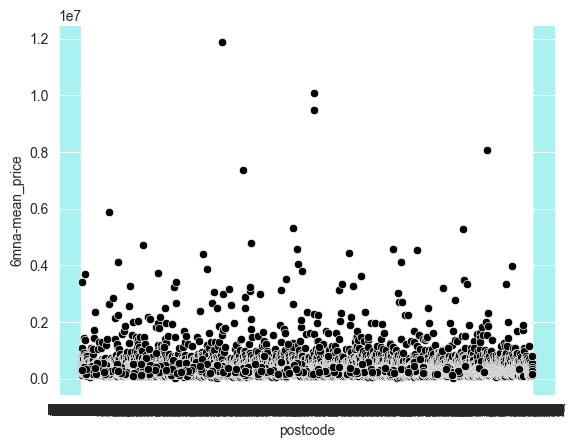

In [160]:

sns.scatterplot(sample_processed_6mna, x="postcode", y="6mna-mean_price")

<Axes: xlabel='6mna-drugs', ylabel='6mna-mean_price'>

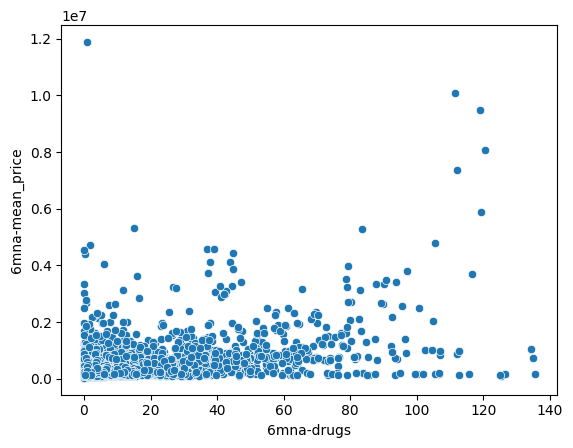

In [61]:
sns.scatterplot(sample_processed_6mna, x="6mna-drugs", y="6mna-mean_price")

# Training

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error


In [48]:
processed_6mna_df

,postcode,date,mean_price,district,sum_property_type_d,sum_property_type_f,sum_property_type_o,sum_property_type_s,sum_property_type_t,sum_tenure_f,...,6mna-drugs,6mna-other-theft,6mna-possession-of-weapons,6mna-public-order,6mna-robbery,6mna-shoplifting,6mna-theft-from-the-person,6mna-vehicle-crime,6mna-violent-crime,6mna-other-crime
0,AL1 1DU,2022-02,8.675000e+05,ST ALBANS,1,0,0,1,0,2,...,3.175000,17.900000,1.700000,11.750000,0.600000,11.750000,3.025000,11.050000,59.025000,2.375000
1,AL1 1HY,2023-12,2.278333e+06,ST ALBANS,1,0,2,0,0,3,...,3.464286,27.000000,2.142857,11.250000,1.607143,18.500000,3.071429,17.964286,61.071429,4.714286
2,AL1 1NG,2021-05,4.627500e+05,ST ALBANS,0,2,0,0,0,0,...,5.384615,8.512821,1.076923,13.717949,0.717949,20.102564,1.948718,11.205128,59.025641,1.923077
3,AL1 1NL,2023-04,6.650000e+05,ST ALBANS,0,1,0,0,1,1,...,4.387097,27.290323,1.774194,8.774194,3.032258,19.612903,3.483871,16.129032,60.064516,3.322581
4,AL1 1NR,2022-02,5.255000e+05,ST ALBANS,0,2,0,0,0,0,...,3.042553,19.361702,1.595745,12.446809,0.617021,12.680851,3.106383,11.957447,63.680851,2.638298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188122,YO8 9UE,2021-09,2.869950e+05,SELBY,1,0,0,1,0,2,...,0.250000,0.812500,0.062500,0.562500,0.000000,0.062500,0.000000,0.250000,6.187500,0.000000
188123,YO8 9UE,2021-10,2.268550e+05,SELBY,0,0,0,5,0,5,...,0.150000,0.650000,0.050000,0.400000,0.000000,0.050000,0.000000,0.350000,5.350000,0.000000
188124,YO8 9UE,2021-11,2.799950e+05,SELBY,3,0,0,2,0,5,...,0.000000,0.600000,0.050000,0.400000,0.000000,0.050000,0.000000,0.350000,4.200000,0.000000
188125,YO8 9UE,2021-12,2.988283e+05,SELBY,4,0,0,2,0,6,...,0.000000,0.619048,0.047619,0.380952,0.000000,0.047619,0.000000,0.428571,4.000000,0.000000


In [206]:
# this prepares the dataset for machine learning modelling by separating the input features (X) from the target variable (y).
X = processed_6mna_df.drop(columns=['postcode','date','district','mean_price','6mna-all-crime','all-crime'])
y = processed_6mna_df['mean_price']

In [207]:
X.to_csv('X.csv')
y.to_csv('y.csv')

In [208]:
# This splits the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [209]:
#scales features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [210]:
# I onlt implement the linear regression as a test
model = LinearRegression()

In [211]:
scoring = ['neg_mean_absolute_error']

In [212]:
#Cross vaidation
scores = cross_validate(model,X_train,y_train, cv=5, scoring=scoring,return_train_score=True)

In [70]:
scores

{'fit_time': array([0.32487607, 0.22295427, 0.22560978, 0.24179816, 0.24587798]),
 'score_time': array([0.01214099, 0.00563693, 0.00577998, 0.00731087, 0.00513983]),
 'test_neg_mean_absolute_error': array([-196361.40997567, -197794.74626492, -223225.44560832,
        -195128.14640954, -198959.37416387]),
 'train_neg_mean_absolute_error': array([-196424.9376314 , -204952.5633584 , -204932.86901697,
        -205444.07965632, -198582.91355091]),
 'test_r2': array([0.06181087, 0.05025485, 0.03218631, 0.09242055, 0.06860663]),
 'train_r2': array([0.05773665, 0.06033914, 0.06962095, 0.05568697, 0.05539934]),
 'test_neg_mean_poisson_deviance': array([nan, nan, nan, nan, nan]),
 'train_neg_mean_poisson_deviance': array([nan, nan, nan, nan, nan])}

In [213]:
scores['test_neg_mean_absolute_error'].mean()

-202293.82448446396

In [214]:
model = model.fit(X_train,y_train)

In [215]:
y_pred = model.predict(X_test)

In [216]:
mean_absolute_error(y_test,y_pred)

219189.98226631037

In [217]:
#xgbregressor model
import xgboost as xgb
modelX = xgb.XGBRegressor()

scores1 = cross_validate(modelX,X_train,y_train, cv=5, scoring=scoring,return_train_score=True)

modelX.fit(X_train, y_train)
prediction = modelX.predict(X_test)

# Calculate the NEGATIVE mean squared error using cross validation
scores1['test_neg_mean_absolute_error'].mean()
# calculates without cross validation
xgb_mae = mean_absolute_error(y_test, prediction)
xgb_r2 = r2_score(y_test, prediction)
xgb_rmse = root_mean_squared_error(y_test, prediction)

print(scores1['test_neg_mean_absolute_error'].mean())
print(xgb_mae)
print(xgb_r2)
print(xgb_rmse)

-171049.15797052594
167374.45134514262
-0.034039513707637914
1075555.5724117644


In [139]:
#lgbm model
import lightgbm as lgb
lgbm = lgb.LGBMRegressor()

scores2 = cross_validate(lgbm,X_train,y_train, cv=5, scoring=scoring,return_train_score=True)

lgbm.fit(X_train, y_train)
prediction = lgbm.predict(X_test)

# Calculate without cross validation
lgb_mae = mean_absolute_error(y_test, prediction)
lgb_r2 = r2_score(y_test, prediction)
lgb_rmse = root_mean_squared_error(y_test, prediction)
# Calculate the negtive mean squared error with cross validation
print(scores2['test_neg_mean_absolute_error'].mean())

print(lgb_mae)
print(xgb_r2)
print(lgb_rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7217
[LightGBM] [Info] Number of data points in the train set: 120400, number of used features: 40
[LightGBM] [Info] Start training from score 375213.727625
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7213
[LightGBM] [Info] Number of data points in the train set: 120401, number of used features: 40
[LightGBM] [Info] Start training from score 376701.657287
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory 

In [140]:
from predictionrevisited import predict_df, demo


In [141]:
subset_df = processed_6mna_df[(processed_6mna_df['date']>= '2022-01') & (processed_6mna_df['date']<= '2022-12')].set_index('postcode')

In [142]:
final_subset = subset_df.head(850)

In [143]:
#Random 850 rows
final_subset= subset_df.sample(n=850, random_state=42)

In [111]:
final_subset

,date,mean_price,district,sum_property_type_d,sum_property_type_f,sum_property_type_o,sum_property_type_s,sum_property_type_t,sum_tenure_f,sum_tenure_l,...,6mna-drugs,6mna-other-theft,6mna-possession-of-weapons,6mna-public-order,6mna-robbery,6mna-shoplifting,6mna-theft-from-the-person,6mna-vehicle-crime,6mna-violent-crime,6mna-other-crime
postcode,,,,,,,,,,,,,,,,,,,,,
NR17 2JQ,2022-03,334250.00,BRECKLAND,2,0,0,0,0,2,0,...,1.538462,1.769231,0.307692,2.769231,0.384615,1.307692,0.076923,2.230769,18.538462,2.923077
BH5 1AT,2022-03,177500.00,"BOURNEMOUTH, CHRISTCHURCH AND POOLE",0,2,0,0,0,0,2,...,10.576271,41.313559,3.305085,31.110169,6.491525,21.754237,3.567797,42.966102,180.864407,2.262712
PE9 1UD,2022-02,510000.00,SOUTH KESTEVEN,0,0,0,2,0,2,0,...,2.714286,7.071429,1.214286,4.714286,1.428571,3.285714,0.428571,3.857143,33.428571,1.428571
ME19 4TD,2022-02,410496.25,TONBRIDGE AND MALLING,1,0,0,1,2,4,0,...,0.450000,2.400000,0.250000,3.550000,0.250000,2.200000,0.050000,1.750000,19.500000,0.500000
BA16 0NF,2022-04,130000.00,MENDIP,0,2,0,0,0,0,2,...,0.400000,6.000000,0.400000,7.000000,0.000000,6.600000,0.200000,0.600000,20.400000,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE3 9SH,2022-03,623750.00,GREENWICH,0,2,0,0,0,0,2,...,23.128571,48.228571,2.785714,32.157143,11.071429,17.757143,10.900000,52.600000,130.600000,5.128571
DA1 3PN,2022-04,195000.00,BEXLEY,0,2,0,0,0,0,2,...,12.228571,23.685714,1.171429,17.628571,3.457143,12.085714,6.057143,28.228571,85.542857,4.200000
ME6 5EH,2022-07,440000.00,TONBRIDGE AND MALLING,2,0,0,1,0,3,0,...,0.593750,4.375000,0.062500,5.437500,0.281250,4.187500,0.250000,2.812500,32.718750,2.187500


In [144]:
X = final_subset.drop(columns=['date','district','mean_price','6mna-all-crime','all-crime'])
y = final_subset[['mean_price']]

In [145]:
test_size = int(np.round(X.shape[0] * 0.2))

In [146]:
# I have to split the data up into train and test again into their specific data frames
observed_attributes_df = X.iloc[:-test_size].copy()
observed_outcomes_df = y.iloc[:-test_size].copy()
prediction_circumstances_df = X.iloc[-test_size:].copy()
actual_outcomes_df = y.iloc[-test_size:].copy()

In [147]:
results = predict_df(observed_attributes_df,prediction_circumstances_df,observed_outcomes_df, thresh=0.5)

In [93]:
#This is for top 850 rows at 0.5 thresh = 290,669 can't run again or reslut will change to 850 random rows
mean_absolute_error(actual_outcomes_df,np.abs(results[0]['yhat']))

290669.7363765815

In [148]:
#This is for 850 random rows at 0.5 thresh
pr_mae = mean_absolute_error(actual_outcomes_df,np.abs(results[0]['yhat']))
pr_mae

275973.5379442564

In [149]:
pr_rmse = root_mean_squared_error(actual_outcomes_df,np.abs(results[0]['yhat']))
pr_rmse

675418.6621285154

In [150]:
pr_r2 = r2_score(actual_outcomes_df,np.abs(results[0]['yhat']))
pr_r2

-0.9514066019448044

# Evaluation

In [151]:
#puts results into array for MAE
results_mae = {
    'Model': ['XGBRegressor', 'LGBMRegressor', 'Prediction Revisited'],
    'MAE': [xgb_mae, lgb_mae, pr_mae]
}
results_plot = pd.DataFrame(results_mae)

print(results_plot)

                  Model            MAE
0          XGBRegressor  167374.451345
1         LGBMRegressor  165609.954588
2  Prediction Revisited  275973.537944


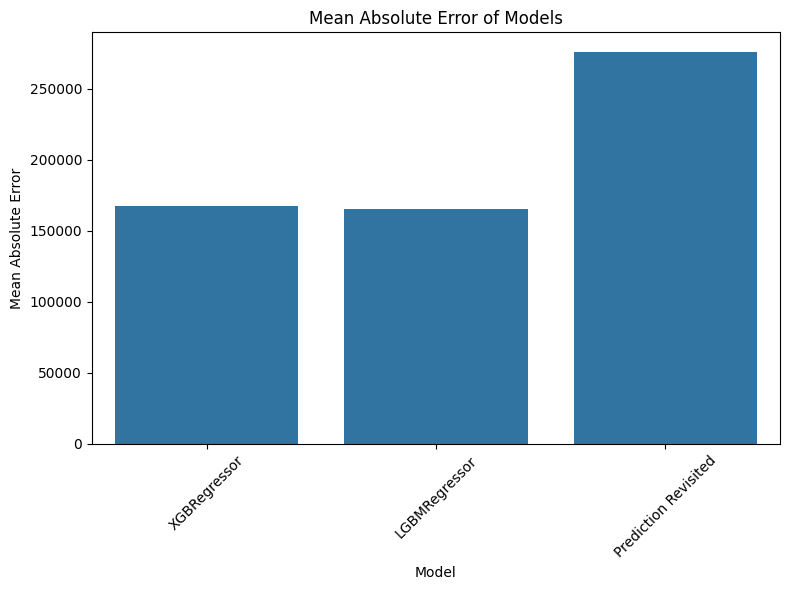

In [152]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='MAE', data =results_mae)


plt.title('Mean Absolute Error of Models')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')


plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()


In [153]:
results_rmse = {
    'Model': ['XGBRegressor', 'LGBMRegressor', 'Prediction Revisited'],
    'RMSE': [xgb_rmse, lgb_rmse, pr_rmse]
}
results_rmse_plot = pd.DataFrame(results_rmse)

print(results_rmse_plot)

                  Model          RMSE
0          XGBRegressor  1.075556e+06
1         LGBMRegressor  9.982500e+05
2  Prediction Revisited  6.754187e+05


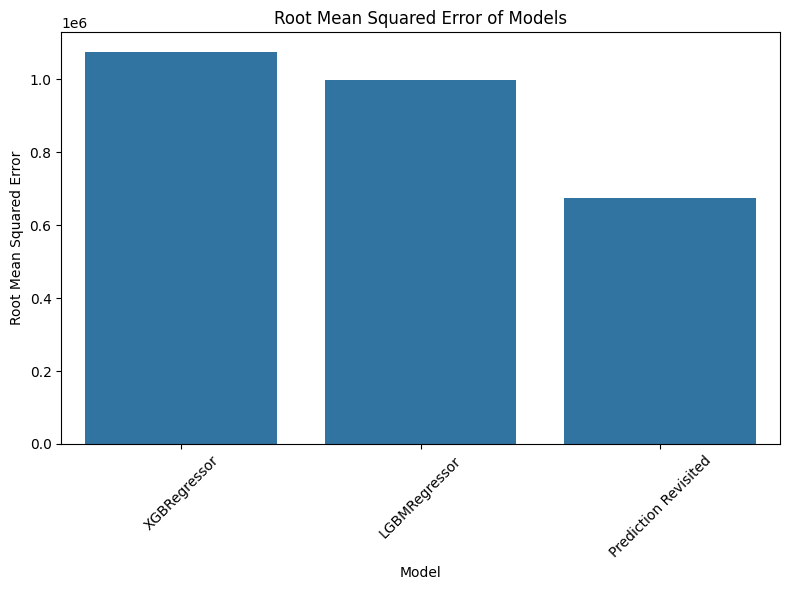

In [154]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='RMSE', data =results_rmse)


plt.title('Root Mean Squared Error of Models')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error')


plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

In [155]:
#puts results into array for R2
results_r2 = {
    'Model': ['XGBRegressor', 'LGBMRegressor', 'Prediction Revisited'],
    'R2': [xgb_r2, lgb_r2, pr_r2]
}
results_plot = pd.DataFrame(results_r2)

print(results_plot)

                  Model        R2
0          XGBRegressor -0.034040
1         LGBMRegressor  0.109262
2  Prediction Revisited -0.951407


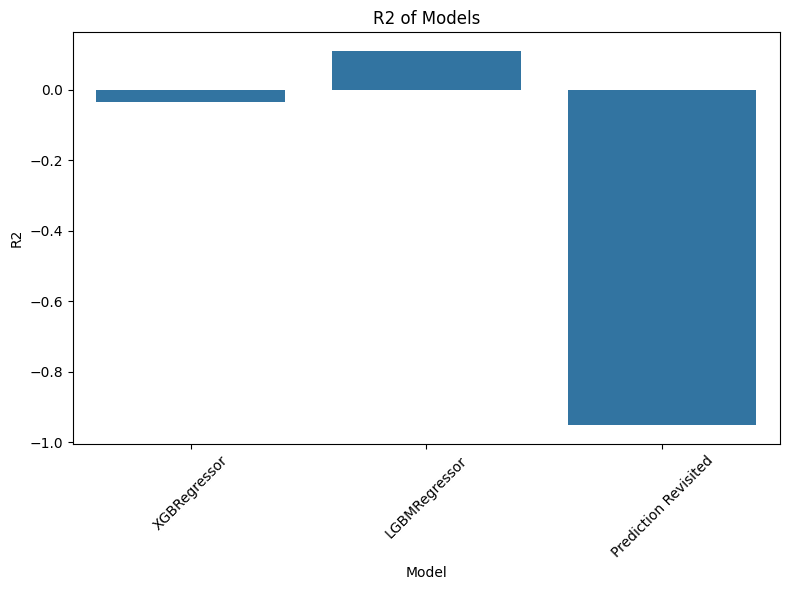

In [156]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='R2', data =results_r2)


plt.title('R2 of Models')
plt.xlabel('Model')
plt.ylabel('R2')


plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

In [69]:
#Shapley values for models
import shap
feature_names = processed_6mna_df.columns.to_list()
explainer = shap.TreeExplainer(modelX,X_test)
shap_values = explainer(pd.DataFrame(data = X_test, columns = X.columns))


100%|===================| 37557/37626 [01:15<00:00]        

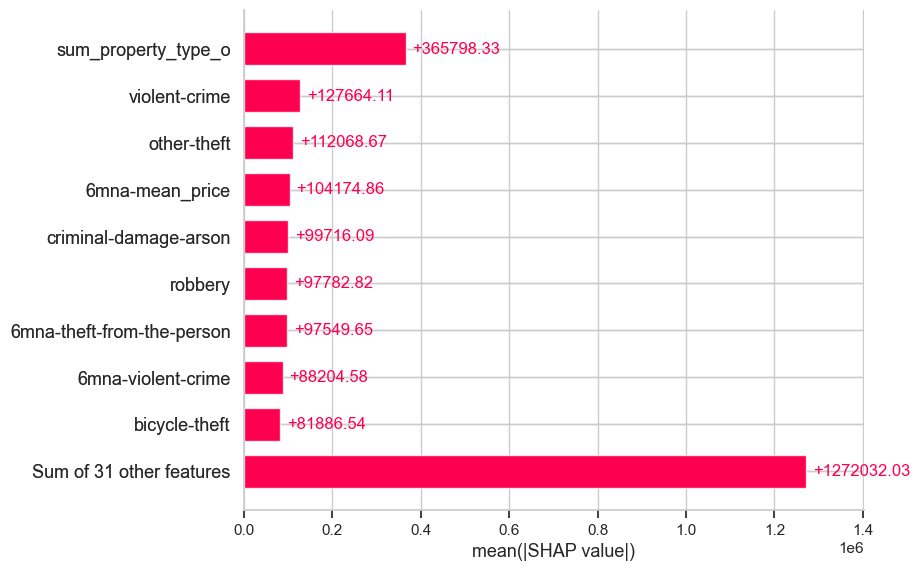

In [144]:
# Summary plot (bar plot of feature importances)
shap.plots.bar(shap_values)


In [147]:

explainer = shap.TreeExplainer(lgbm)


In [156]:
shap_values = explainer(pd.DataFrame(data = X_test, columns = X.columns))

In [157]:
shap_values.mean(axis=1)

.values =
array([-3447.58548033,   133.44871975,  1195.13627913, ...,
        3620.03962944, 12474.08971057, -2716.62209648])

.data =
array([-0.25771735, -0.37402608,  0.75229241, ..., -0.51477948,
       -0.34672379,  0.99130106])

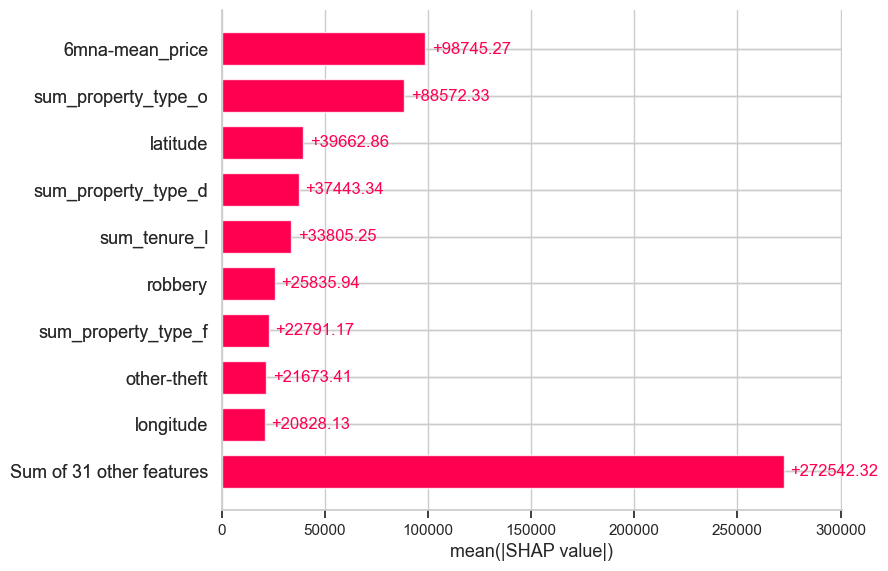

In [158]:
shap.plots.bar(shap_values)